In [ ]:
#!pip3 freeze

# Einlesen und erste Betrachtung des Datensatzes

In [1]:
#importing modules
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#loading data
data = pd.read_csv("data-final.csv", sep="\t")
data.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3,1,SE,59.3333,18.05
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,2016-03-03 02:05:00,360.0,640.0,36.0,179.0,10,1,US,30.3322,-81.6556
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,...,2016-03-03 02:05:08,1440.0,900.0,15.0,210.0,17,1,MY,2.9927,101.7909
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,...,2016-03-03 02:05:27,2560.0,1440.0,2.0,181.0,4,1,GB,53.423,-2.2166
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,...,2016-03-03 02:08:06,1600.0,900.0,6.0,261.0,13,1,FI,60.1708,24.9375


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [ ]:
data.describe()

In [3]:
columns = data.columns.tolist()
columns

['EXT1',
 'EXT2',
 'EXT3',
 'EXT4',
 'EXT5',
 'EXT6',
 'EXT7',
 'EXT8',
 'EXT9',
 'EXT10',
 'EST1',
 'EST2',
 'EST3',
 'EST4',
 'EST5',
 'EST6',
 'EST7',
 'EST8',
 'EST9',
 'EST10',
 'AGR1',
 'AGR2',
 'AGR3',
 'AGR4',
 'AGR5',
 'AGR6',
 'AGR7',
 'AGR8',
 'AGR9',
 'AGR10',
 'CSN1',
 'CSN2',
 'CSN3',
 'CSN4',
 'CSN5',
 'CSN6',
 'CSN7',
 'CSN8',
 'CSN9',
 'CSN10',
 'OPN1',
 'OPN2',
 'OPN3',
 'OPN4',
 'OPN5',
 'OPN6',
 'OPN7',
 'OPN8',
 'OPN9',
 'OPN10',
 'EXT1_E',
 'EXT2_E',
 'EXT3_E',
 'EXT4_E',
 'EXT5_E',
 'EXT6_E',
 'EXT7_E',
 'EXT8_E',
 'EXT9_E',
 'EXT10_E',
 'EST1_E',
 'EST2_E',
 'EST3_E',
 'EST4_E',
 'EST5_E',
 'EST6_E',
 'EST7_E',
 'EST8_E',
 'EST9_E',
 'EST10_E',
 'AGR1_E',
 'AGR2_E',
 'AGR3_E',
 'AGR4_E',
 'AGR5_E',
 'AGR6_E',
 'AGR7_E',
 'AGR8_E',
 'AGR9_E',
 'AGR10_E',
 'CSN1_E',
 'CSN2_E',
 'CSN3_E',
 'CSN4_E',
 'CSN5_E',
 'CSN6_E',
 'CSN7_E',
 'CSN8_E',
 'CSN9_E',
 'CSN10_E',
 'OPN1_E',
 'OPN2_E',
 'OPN3_E',
 'OPN4_E',
 'OPN5_E',
 'OPN6_E',
 'OPN7_E',
 'OPN8_E',
 'OPN9_E',
 '

# Datenvorverarbeitung

## Untersuchung + Bereinigen fehlende Werte

In [ ]:
#looking for missing values
data[columns].isnull().sum()

In [ ]:
data.isnull().mean()

In [4]:
#creating a copy of the dataset and drop the missing values
df = data.copy()
df.dropna(inplace = True)

In [5]:
#comparing the length of both datasets

print(len(data))
print(len(df))

1015341
1012050


result of the comparison: nearly 3000 objects were dropped

In [6]:
#checking if there are any missing values left
df.isnull().values.any()

False

## Einteilung der Aussagen in ihre Cluster

In [7]:
#group questions with column name 

ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [8]:
#group columns for every type

EXT_col = [col for col in data if col.startswith('EXT')]
EST_col = [col for col in data if col.startswith('EST')]
AGR_col = [col for col in data if col.startswith('AGR')]
CSN_col = [col for col in data if col.startswith('CSN')]
OPN_col = [col for col in data if col.startswith('OPN')]

In [9]:
#group positively and negatively keyed questions

positiv_questions = ['EXT1', 'EXT3', 'EXT5', 'EXT7', 'EXT9',
                    'EST1', 'EST3', 'EST5', 'EST6', 'EST7', 
                    'EST8', 'EST9', 'EST10',
                    'AGR2', 'AGR4', 'AGR6', 'AGR8', 'AGR9', 'AGR10',
                    'CSN1', 'CSN3', 'CSN5', 'CSN7', 'CSN9', 'CSN10', 
                    'OPN1', 'OPN3', 'OPN5', 'OPN7', 'OPN8', 'OPN9', 
                    'OPN10']

negative_questions = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
                    'EST2', 'EST4',
                    'AGR1', 'AGR3', 'AGR5', 'AGR7', 
                    'CSN2', 'CSN4', 'CSN6', 'CSN8', 
                    'OPN2', 'OPN4', 'OPN6']

In [10]:
#reverse values of negative questions

df.loc[:, negative_questions] = 6 - df.loc[:, negative_questions]
df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
5,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,...,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3,1,SE,59.3333,18.05
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,2016-03-03 02:05:00,360.0,640.0,36.0,179.0,10,1,US,30.3322,-81.6556
7,3.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,3.0,4.0,...,2016-03-03 02:05:08,1440.0,900.0,15.0,210.0,17,1,MY,2.9927,101.7909
8,2.0,4.0,3.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0,...,2016-03-03 02:05:27,2560.0,1440.0,2.0,181.0,4,1,GB,53.423,-2.2166
9,1.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,5.0,2.0,...,2016-03-03 02:08:06,1600.0,900.0,6.0,261.0,13,1,FI,60.1708,24.9375


# Personality Clustering

In [11]:
from sklearn.cluster import KMeans

# new data frame that just includes the answers on the questions
df_model = df[df.columns.tolist()[:50]]

# creating a model and fitting it with the data 
kmeans = KMeans(n_clusters=5)
km_fitted = kmeans.fit(df_model)

In [12]:
# adding the column cluster to the data frame

df_model.loc[:, 'Cluster'] = km_fitted.labels_
df_model.head(5)


C:\Users\Marco Dolenga\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Marco Dolenga\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluster
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,5.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0,2
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,4.0,4.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,3
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,5.0,2.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,3
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,4.0,5.0,4.0,3.0,5.0,4.0,4.0,3.0,3.0,1
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,2


In [13]:
#count the rows for every cluster

df_model.Cluster.value_counts()

4    226798
3    212802
2    208948
0    200928
1    162574
Name: Cluster, dtype: int64

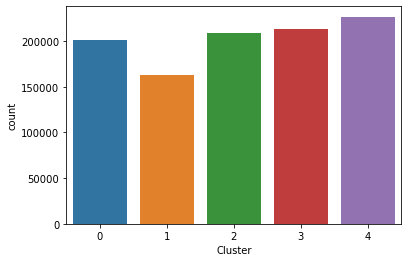

In [14]:
# visualize the amount in a countplot

sns.countplot(data=df_model, x='Cluster')

In [15]:
from sklearn.preprocessing import LabelEncoder

df_model['Country_cat'] = df['country']
le = LabelEncoder()

le.fit(df_model['Country_cat'])
df_model.loc[:, 'Country_num'] = le.transform(df_model['Country_cat'])

df_model.head(10)

<ipython-input-15-f2ddf54dd674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Country_cat'] = df['country']
C:\Users\Marco Dolenga\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Marco Dolenga\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluster,Country_cat,Country_num
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,5.0,4.0,5.0,5.0,3.0,4.0,5.0,2,GB,69
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,4.0,3.0,5.0,4.0,2.0,5.0,3.0,3,MY,144
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,5.0,4.0,4.0,5.0,3.0,4.0,4.0,3,GB,69
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,4.0,3.0,5.0,4.0,4.0,3.0,3.0,1,GB,69
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,...,5.0,5.0,5.0,5.0,3.0,5.0,5.0,2,KE,103
5,3.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,...,5.0,3.0,5.0,5.0,4.0,5.0,2.0,2,SE,179
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,3.0,4.0,5.0,5.0,5.0,4.0,4.0,4,US,208
7,3.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,3.0,4.0,...,5.0,5.0,5.0,4.0,3.0,4.0,5.0,2,MY,144
8,2.0,4.0,3.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0,...,5.0,4.0,5.0,5.0,2.0,5.0,5.0,2,GB,69
9,1.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,5.0,2.0,...,5.0,3.0,3.0,4.0,3.0,3.0,3.0,1,FI,62


## Dimensionsreduktion & Vergleich der angefertigten Clustern

In [16]:
# creating a new data frame to reduce the dimensions for every catagory
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

df_sums = pd.DataFrame()
df_sums['extroversion'] = df_model[ext].sum(axis=1)/10
df_sums['neurotic'] = df_model[est].sum(axis=1)/10
df_sums['agreeable'] = df_model[agr].sum(axis=1)/10
df_sums['conscientious'] = df_model[csn].sum(axis=1)/10
df_sums['open'] = df_model[opn].sum(axis=1)/10
df_sums['cluster'] = df_model['Cluster'] #Target-Größe

# displaying the mean for every catagory in each cluster
df_sums.groupby('cluster').mean()

,extroversion,neurotic,agreeable,conscientious,open
cluster,,,,,
0,2.083119,3.926438,3.468797,2.904685,3.725170
1,2.560179,2.423333,2.887992,3.209340,3.705153
2,3.861077,2.200909,4.173309,3.764936,4.087289
3,2.488455,3.032235,4.071116,3.888516,3.810724
4,3.663306,3.559125,3.965797,2.977125,3.980471


Cluster 0 sehr introvertiert (wenig extrovertiert) und neurotisch --> leichte negative Korrelation

Wirkliche Basistypen nicht rauszufiltern, recht ähnlich bei Open - auch sonst alles innerhalb von 1.0 Abweichung nur

EXTROVERSION


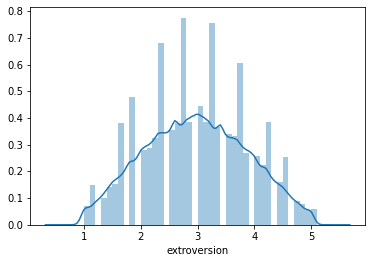


NEUROTIC


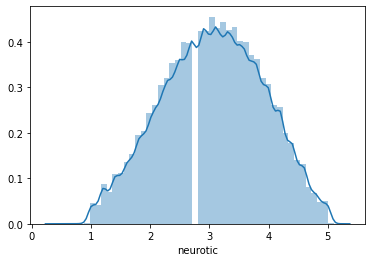


AGREEABLE


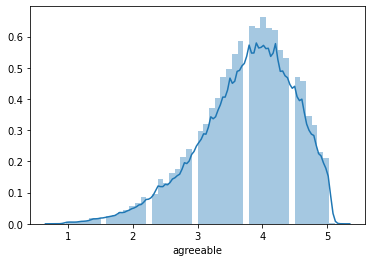


CONSCIENTIOUS


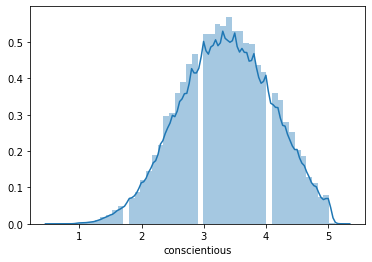


OPEN


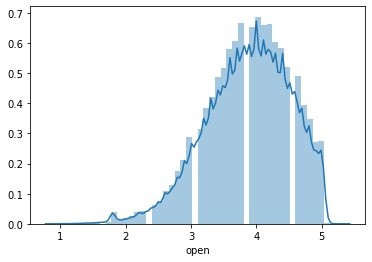

In [17]:
# plot histograms for every category

for col in df_sums.columns:
    if col == 'cluster':
        continue
    print(col.upper())
    sns.distplot(df_sums[col])
    plt.show()
    print()

PEARSON


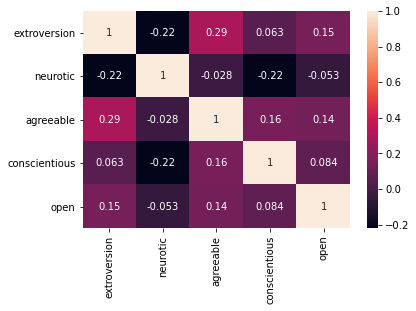


SPEARMAN


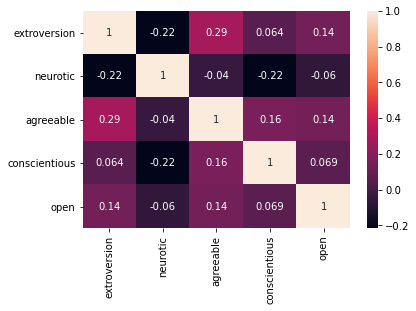


KENDALL


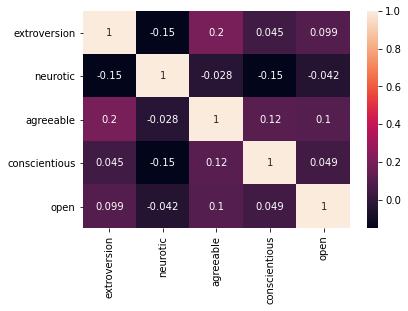

In [18]:
# creating heatmaps to visualize the correlations between each category (using 3 different methods)

meths = ['pearson', 'spearman', 'kendall']

for meth in meths:
    print(meth.upper())
    corrm= df_sums.drop(columns='cluster').corr(method=meth)
    sns.heatmap(corrm, annot=True)
    plt.show()
    print()

In [19]:
# calculating the total time answering the questions (in minutes) 
df_sums['total_time_min'] = round(df[df.columns.tolist()[50:100]].sum(axis=1)/60000, 2)
df_sums.head()

,extroversion,neurotic,agreeable,conscientious,open,cluster,total_time_min
0,4.6,2.4,3.9,3.2,4.5,2,3.87
1,2.0,2.5,4.4,3.7,3.5,3,2.95
2,2.5,2.6,4.2,3.4,4.1,3,3.08
3,2.6,2.9,3.8,2.5,3.9,1,3.64
4,2.9,1.9,4.6,4.8,4.8,2,5.21


KeyboardInterrupt: 

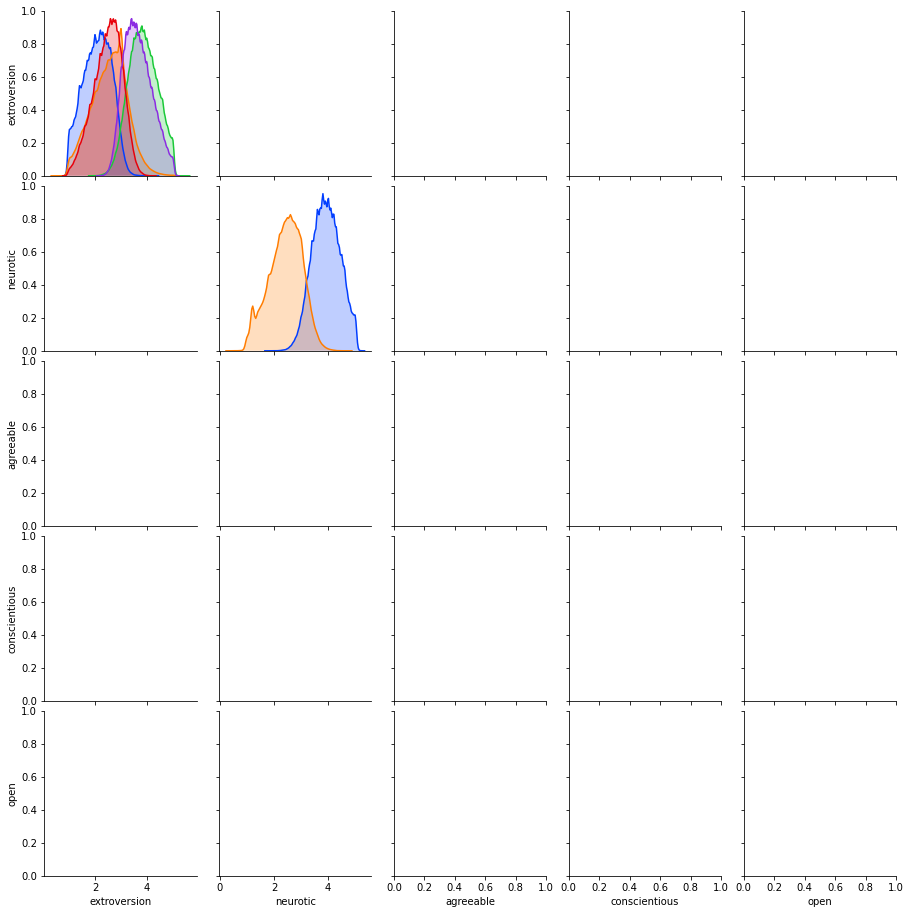

In [20]:
# ploting pairplots of each catagory (be aware that the calculation takes a lot of time!!!)

sns.pairplot(df_sums.drop(columns='total_time_min'), hue="cluster", palette="bright")

# Analysis:  Do the subjects' statements depend on the time of day?


Da die Studie in den USA erhoben wurde und die dortige Uhrzeit für alle Probanden übernommen wurde, reduziert sich die Analyse auf US-Bürger. Dazu wird ein Datensatz nur mit US-Amerikanern benutzt.

In [21]:
#filter to get only US citizens and checking the length
US = df['country'] == 'US'
Dataset_USA = df[US]
Dataset_USA = Dataset_USA[Dataset_USA.columns.tolist()[:50]]
Dataset_USA['dateload'] = df['dateload']

#print(len(Dataset_USA))

In [22]:
#creating a column for the time of the day, the survey was uploaded

Dataset_USA['time'] = Dataset_USA.dateload.str[11:13].astype(int)
Dataset_USA

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,time
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,4.0,3.0,4.0,5.0,5.0,5.0,4.0,4.0,2016-03-03 02:05:00,2
21,3.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,1.0,3.0,...,3.0,4.0,2.0,1.0,3.0,2.0,1.0,2.0,2016-03-03 02:22:02,2
51,1.0,4.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,5.0,4.0,3.0,5.0,3.0,4.0,4.0,4.0,2016-03-03 02:59:55,2
71,3.0,2.0,1.0,2.0,3.0,4.0,2.0,2.0,3.0,1.0,...,2.0,4.0,4.0,2.0,5.0,3.0,4.0,2.0,2016-03-03 03:19:48,3
100,3.0,4.0,5.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,2016-03-03 03:49:44,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,4.0,3.0,4.0,4.0,4.0,2.0,2.0,4.0,2018-11-08 12:04:58,12
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,...,5.0,5.0,5.0,5.0,3.0,4.0,5.0,4.0,2018-11-08 12:07:18,12
1015338,4.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,2.0,...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,2018-11-08 12:07:49,12
1015339,2.0,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,...,4.0,4.0,3.0,4.0,4.0,5.0,5.0,3.0,2018-11-08 12:08:34,12


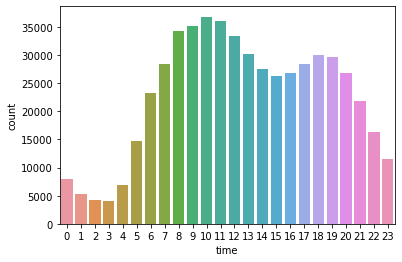

In [23]:
#visualizing the quantity of every hour
sns.countplot(data=Dataset_USA, x=Dataset_USA['time'])

In [24]:
#clustering the new time column in the categories 'morning', 'noon', 'evening', 'night'


intervals = [0,6,12,18,24]
daytime_categories = ['morning', 'noon', 'evening', 'night']

Dataset_USA['daytime'] = pd.cut(x= Dataset_USA['time'], bins = intervals, labels = daytime_categories, include_lowest = True)
Dataset_USA

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,time,daytime
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,3.0,4.0,5.0,5.0,5.0,4.0,4.0,2016-03-03 02:05:00,2,morning
21,3.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,1.0,3.0,...,4.0,2.0,1.0,3.0,2.0,1.0,2.0,2016-03-03 02:22:02,2,morning
51,1.0,4.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,4.0,3.0,5.0,3.0,4.0,4.0,4.0,2016-03-03 02:59:55,2,morning
71,3.0,2.0,1.0,2.0,3.0,4.0,2.0,2.0,3.0,1.0,...,4.0,4.0,2.0,5.0,3.0,4.0,2.0,2016-03-03 03:19:48,3,morning
100,3.0,4.0,5.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,2016-03-03 03:49:44,3,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,3.0,4.0,4.0,4.0,2.0,2.0,4.0,2018-11-08 12:04:58,12,noon
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,...,5.0,5.0,5.0,3.0,4.0,5.0,4.0,2018-11-08 12:07:18,12,noon
1015338,4.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,2.0,...,5.0,4.0,5.0,5.0,5.0,4.0,5.0,2018-11-08 12:07:49,12,noon
1015339,2.0,2.0,3.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,...,4.0,3.0,4.0,4.0,5.0,5.0,3.0,2018-11-08 12:08:34,12,noon


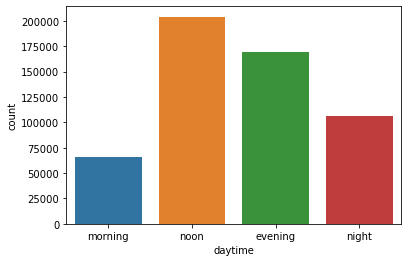

In [25]:
#visualize the different categories in daytime
sns.countplot(data = Dataset_USA, x = Dataset_USA['daytime'])

In [26]:
#creating variables for each category in daytime
morning = Dataset_USA['daytime'] == 'morning'
noon = Dataset_USA['daytime'] == 'noon'
evening = Dataset_USA['daytime'] == 'evening'
night = Dataset_USA['daytime'] == 'night'

In [27]:
#looking up the dataset for the morning category
Dataset_USA[morning]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,time,daytime
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,3.0,4.0,5.0,5.0,5.0,4.0,4.0,2016-03-03 02:05:00,2,morning
21,3.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,1.0,3.0,...,4.0,2.0,1.0,3.0,2.0,1.0,2.0,2016-03-03 02:22:02,2,morning
51,1.0,4.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,4.0,3.0,5.0,3.0,4.0,4.0,4.0,2016-03-03 02:59:55,2,morning
71,3.0,2.0,1.0,2.0,3.0,4.0,2.0,2.0,3.0,1.0,...,4.0,4.0,2.0,5.0,3.0,4.0,2.0,2016-03-03 03:19:48,3,morning
100,3.0,4.0,5.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,2016-03-03 03:49:44,3,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014511,1.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,4.0,3.0,...,4.0,3.0,2.0,4.0,3.0,4.0,3.0,2018-11-08 06:50:13,6,morning
1014513,2.0,2.0,3.0,2.0,3.0,4.0,1.0,4.0,2.0,2.0,...,4.0,3.0,4.0,2.0,2.0,4.0,3.0,2018-11-08 06:52:06,6,morning
1014515,3.0,3.0,4.0,5.0,5.0,5.0,5.0,3.0,3.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2018-11-08 06:55:46,6,morning
1014516,4.0,5.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,3.0,...,3.0,4.0,3.0,3.0,2.0,4.0,4.0,2018-11-08 06:56:27,6,morning


In [28]:
#looking up the mean values of morning category
Dataset_USA[morning].mean()

EXT1     2.658358
EXT2     3.250616
EXT3     3.296871
EXT4     2.857774
EXT5     3.283893
EXT6     3.617776
EXT7     2.792416
EXT8     2.516147
EXT9     2.929000
EXT10    2.419176
EST1     3.325201
EST2     2.811459
EST3     3.867953
EST4     3.370789
EST5     2.736723
EST6     2.822864
EST7     3.030372
EST8     2.641084
EST9     3.117980
EST10    2.739083
AGR1     3.841332
AGR2     3.822834
AGR3     3.706805
AGR4     3.929923
AGR5     3.732579
AGR6     3.750851
AGR7     3.826524
AGR8     3.733562
AGR9     3.774991
AGR10    3.598793
CSN1     3.286146
CSN2     3.040703
CSN3     3.992573
CSN4     3.377596
CSN5     2.572474
CSN6     3.140290
CSN7     3.723247
CSN8     3.547351
CSN9     3.235355
CSN10    3.586738
OPN1     3.628666
OPN2     3.937516
OPN3     4.009212
OPN4     3.999501
OPN5     3.824392
OPN6     4.108602
OPN7     3.959342
OPN8     3.181568
OPN9     4.120884
OPN10    4.012055
time     4.015247
dtype: float64

In [29]:
#store the mean value of every daytime category in a list
mean_list_morning = list(Dataset_USA[morning].mean())
mean_list_noon = list(Dataset_USA[noon].mean())
mean_list_evening = list(Dataset_USA[evening].mean())
mean_list_night = list(Dataset_USA[night].mean())


KeyboardInterrupt: 

In [30]:
# creating a new USA data frame to reduce the dimensions and compare the answers in relation to the daytime
col_list = list(Dataset_USA)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

df_sums_usa = pd.DataFrame()
df_sums_usa['extroversion'] = Dataset_USA[ext].sum(axis=1)/10
df_sums_usa['neurotic'] = Dataset_USA[est].sum(axis=1)/10
df_sums_usa['agreeable'] = Dataset_USA[agr].sum(axis=1)/10
df_sums_usa['conscientious'] = Dataset_USA[csn].sum(axis=1)/10
df_sums_usa['open'] = Dataset_USA[opn].sum(axis=1)/10
df_sums_usa['daytime'] = Dataset_USA['daytime']

# displaying the mean for every catagory in each cluster
df_sums_usa.groupby('daytime').mean()

,extroversion,neurotic,agreeable,conscientious,open
daytime,,,,,
morning,2.962203,3.046351,3.771819,3.350247,3.878174
noon,3.042272,3.016163,3.836100,3.433713,3.846230
evening,2.968883,3.012550,3.832047,3.437154,3.904138
night,2.911523,3.077329,3.795693,3.331708,3.934900


**Result**: The answers of the americans who participated in the survey do not differ on different daytimes! 

# Comparison of the personalities around the world

In [31]:
print(df['country'].values)

['GB' 'MY' 'GB' ... 'US' 'US' 'US']


In [32]:
# creating a newdata frame to reduce the dimensions and compare the statements of the countrys
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

df_sums_world = pd.DataFrame()
df_sums_world['extroversion'] = df[ext].sum(axis=1)/10
df_sums_world['neurotic'] = df[est].sum(axis=1)/10
df_sums_world['agreeable'] = df[agr].sum(axis=1)/10
df_sums_world['conscientious'] = df[csn].sum(axis=1)/10
df_sums_world['open'] = df[opn].sum(axis=1)/10
df_sums_world['country'] = df['country']

# displaying the mean for every catagory in each country
country_means_per_category = df_sums_world.groupby('country').mean()
country_means_per_category

,extroversion,neurotic,agreeable,conscientious,open
country,,,,,
AD,2.970588,2.841176,3.829412,3.347059,3.870588
AE,3.030301,3.125753,3.763285,3.392016,3.719863
AF,3.101852,2.825926,3.622222,3.424074,3.650000
AG,2.733333,3.050000,3.554167,3.362500,3.991667
AI,2.775000,3.025000,4.250000,3.625000,4.250000
...,...,...,...,...,...
XK,2.828571,3.000000,3.600000,2.885714,3.771429
YE,3.078571,3.292857,3.507143,3.278571,3.764286
ZA,2.935958,3.016871,3.800507,3.493380,3.985291


In [63]:
# getting an overview about the range/highs/lows in the columns and examine the countries with max-min values
print(country_means_per_category.loc[country_means_per_category['extroversion'].idxmax()])
print()
print(country_means_per_category.loc[country_means_per_category['extroversion'].idxmin()])


extroversion     3.9
neurotic         2.7
agreeable        4.5
conscientious    3.6
open             4.4
Name: BI, dtype: float64
extroversion     1.8
neurotic         2.9
agreeable        4.4
conscientious    3.2
open             4.1
Name: GN, dtype: float64


**Most extroversion: Burundi**

**Most interversion: Guinea**

In [59]:
print(country_means_per_category.loc[country_means_per_category['neurotic'].idxmax()])
print(country_means_per_category.loc[country_means_per_category['neurotic'].idxmin()])

extroversion     3.9
neurotic         4.2
agreeable        4.6
conscientious    2.9
open             4.3
Name: SH, dtype: float64
extroversion     3.7
neurotic         1.7
agreeable        4.7
conscientious    4.7
open             3.7
Name: TD, dtype: float64


**Most neurotic: St. Helena**

**least neurotic : Tschad**

In [60]:
print(country_means_per_category.loc[country_means_per_category['agreeable'].idxmax()])
print(country_means_per_category.loc[country_means_per_category['agreeable'].idxmin()])

extroversion     3.7
neurotic         1.7
agreeable        4.7
conscientious    4.7
open             3.7
Name: TD, dtype: float64
extroversion     2.25
neurotic         3.30
agreeable        2.55
conscientious    3.85
open             2.65
Name: BQ, dtype: float64


**Most agreeable: Tschad**

**least agreeable: Bonaire, Sint Eustatius und Saba**

In [61]:
print(country_means_per_category.loc[country_means_per_category['conscientious'].idxmax()])
print(country_means_per_category.loc[country_means_per_category['conscientious'].idxmin()])

extroversion     3.7
neurotic         1.7
agreeable        4.7
conscientious    4.7
open             3.7
Name: TD, dtype: float64
extroversion     2.6
neurotic         2.3
agreeable        4.6
conscientious    1.5
open             4.7
Name: GQ, dtype: float64


**Most conscientious: Tschad**

**least conscientious: Äquatorialguines**

In [62]:
print(country_means_per_category.loc[country_means_per_category['open'].idxmax()])
print(country_means_per_category.loc[country_means_per_category['open'].idxmin()])

extroversion     3.55
neurotic         2.00
agreeable        3.60
conscientious    3.70
open             4.95
Name: ML, dtype: float64
extroversion     2.25
neurotic         3.30
agreeable        2.55
conscientious    3.85
open             2.65
Name: BQ, dtype: float64


**Most open: Mali**

**least open: Bonaire, Sint Eustatius und Saba**

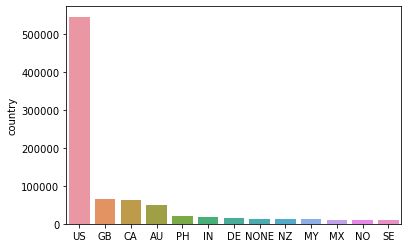

In [44]:
#plot countries with more than 10.000 participants

countries = pd.DataFrame(df['country'].value_counts())
countries_10k = countries[countries['country'] >= 10000]

sns.barplot(data=countries_10k, x=countries_10k.index, y='country')

In [38]:
# looking at the means of germany
countries = pd.DataFrame(df['country'].value_counts())
countries_10k = countries[countries['country'] >= 10000]

germany = df_sums_world['country'] == 'DE'
df_sums_world[germany].mean()


extroversion     2.874052
neurotic         3.007480
agreeable        3.616217
conscientious    3.220770
open             4.089778
dtype: float64

Deutschland sehr ausgeglichene Nation --> Überall circa im Durchschnitt, etwas weniger gewissenhaft 

In [49]:
# mean comparison of those countries that had more than 10.000 participants
country_means_per_category[df['country'].value_counts() >= 10000]

<ipython-input-49-c4ec54d2b17c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_means_per_category[df['country'].value_counts() >= 10000]


,extroversion,neurotic,agreeable,conscientious,open
country,,,,,
AU,3.000748,3.033602,3.781791,3.352642,3.833872
CA,2.960938,3.059155,3.775149,3.363155,3.897849
DE,2.874052,3.007480,3.616217,3.220770,4.089778
GB,2.975653,3.161078,3.703372,3.245720,3.902114
IN,3.021763,3.058890,3.708724,3.379531,3.701162
MX,2.942096,3.177300,3.554853,3.200817,3.846372
MY,2.865712,3.154456,3.607369,3.296977,3.422054
NO,3.100233,2.970527,3.775576,3.360065,3.915707
NONE,2.902406,3.084579,3.696128,3.340394,3.846657


PEARSON


<ipython-input-55-423843f90040>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corrm= country_means_per_category[df['country'].value_counts() >= 10000].corr(method=meth)


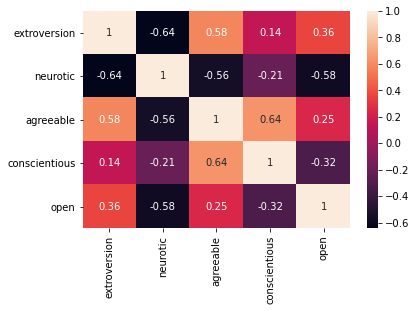


SPEARMAN


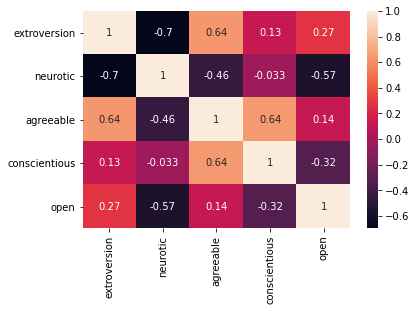


KENDALL


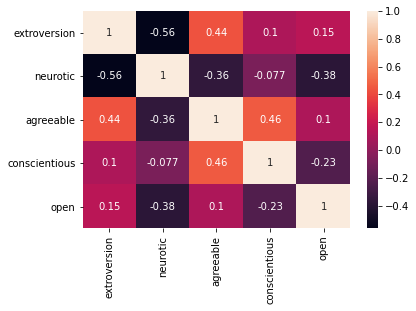

In [55]:
# creating heatmaps to visualize the correlations between each category (using 3 different methods)

meths = ['pearson', 'spearman', 'kendall']

for meth in meths:
    print(meth.upper())
    corrm= country_means_per_category[df['country'].value_counts() >= 10000].corr(method=meth)
    sns.heatmap(corrm, annot=True)
    plt.show()
    print()

**Result:** There are only narrow differences between the mean answers of the examined countries (10.000+ participants). Therefore, also the nationality of the participants is not critical for the given statements.

Interesting could be a view on the correlation matrix. In the smaller Dataset country_mean_per_country are many strong (positive as well as negative) correlations betwenn the columns!

# others

In [ ]:
print(Dataset_USA[noon].endelapse.mean())
print(Dataset_USA[morning].endelapse.mean())

In [ ]:
Dataset_USA['screenh'].describe()

In [ ]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1IjoiYnJvcGF0IiwiYSI6ImNrb2lyaWJoMzAyOHMyd3FmYnBqa2hrZjUifQ.utUXWtMpFaZaLkUDuOC7xw")
fig = px.scatter_mapbox(Dataset_USA, lat="lat_appx_lots_of_err", lon="long_appx_lots_of_err", color = 'vehicle_type',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()